In [1]:
!pip install simpleitk

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import os
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
reference_path = os.path.join('reference')

In [4]:
file = os.path.join(reference_path, 'average_template_25.nii.gz')
average_template_image = sitk.ReadImage(file)
average_template_array = sitk.GetArrayViewFromImage(average_template_image)

file = os.path.join(reference_path, 'annotation_25.nii.gz')
annotation_image = sitk.ReadImage(file)
annotation_array = sitk.GetArrayViewFromImage(annotation_image)
annotation_index = np.where( annotation_array > 0 )
annotation = annotation_array[annotation_index]
parcellation_index = np.unique( annotation_array[annotation_index] )

file = os.path.join(reference_path, 'annotation_boundary_25.nii.gz')
annotation_boundary_image = sitk.ReadImage(file)
annotation_boundary_array = sitk.GetArrayViewFromImage(annotation_boundary_image)

In [5]:
def plot_section(slice, cmap = plt.cm.Greys_r, fig_width = 8, fig_height = 8):
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)
    if cmap is not None:
        plt.imshow(slice, cmap=cmap)
    else :
        plt.imshow(slice)
    plt.axis("off")
    return fig, ax

In [6]:
def load_user_data(user_number="1267695363"):
    complete_path = user_number + "_intensity_quantification"
    
    green_intensity_path = os.path.join(complete_path, "resampled_green_25.nii.gz")
    green_intensity_image = sitk.ReadImage(green_intensity_path)
    green_intensity_array = sitk.GetArrayViewFromImage(green_intensity_image)
    
    red_intensity_path = os.path.join(complete_path, "resampled_red_25.nii.gz")
    red_intensity_image = sitk.ReadImage(red_intensity_path)
    red_intensity_array = sitk.GetArrayViewFromImage(red_intensity_image)

    zindex = 273
    zslice = np.transpose(green_intensity_array[:, :, zindex])
    fig, ax = plot_section(zslice)
    res = ax.set_title(user_number + 'green_nii_25')
    plt.show()

    zslice_red = np.transpose(red_intensity_array[:, :, zindex])
    value = np.max(zslice_red) * 0.6
    zbound = np.transpose(annotation_boundary_array[:, :, zindex])
    zmerged = np.copy(zslice_red)
    sindx = np.where(zbound > 0)
    zmerged[sindx] = value
    fig2, ax2 = plot_section(zmerged)
    ax2.set_title(f"{user_number} red with boundary overlay")
    plt.show()

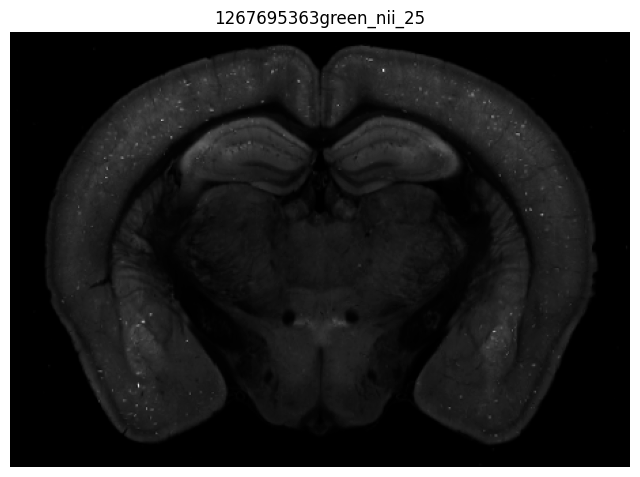

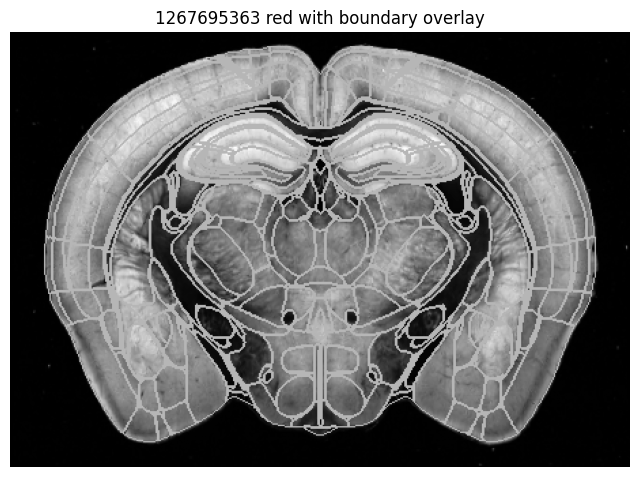

In [7]:
load_user_data()

## see: reference/itksnap_label_description.txt

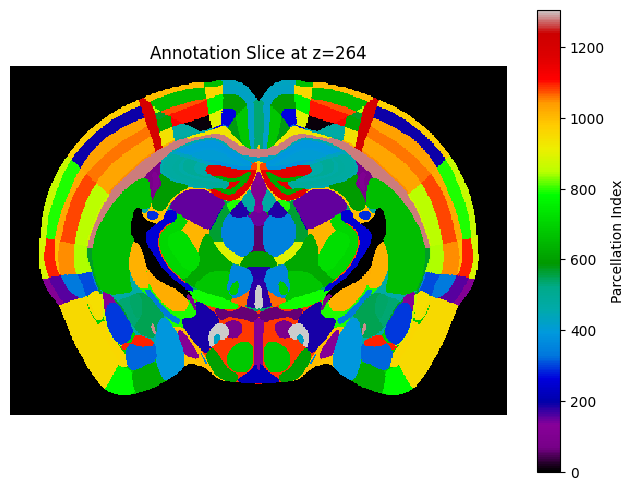

In [8]:
zindex = annotation_array.shape[2] // 2  # Middle slice
zslice = np.transpose(annotation_array[:, :, zindex])

plt.figure(figsize=(8, 6))
plt.imshow(zslice, cmap='nipy_spectral', interpolation='none')
plt.colorbar(label='Parcellation Index')
plt.title(f'Annotation Slice at z={zindex}')
plt.axis('off')
plt.show()

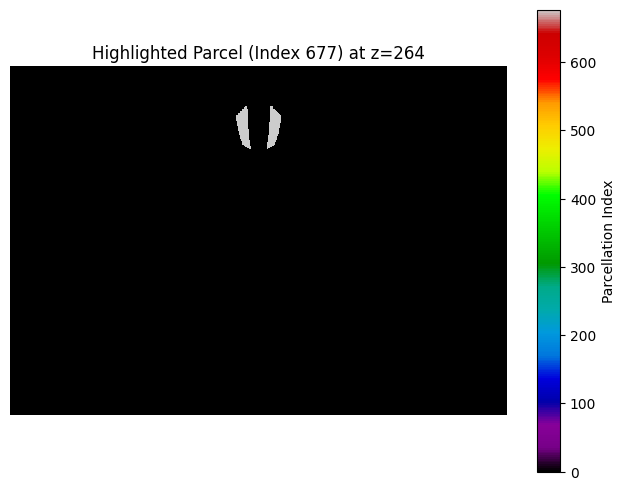

In [9]:
desired_index = 677 # reference/parcellation_to_parcellation_term_membership_acronym

# Create a mask for the specific parcellation index
zindex = annotation_array.shape[2] // 2  # Middle slice
zslice = np.transpose(annotation_array[:, :, zindex])

# Create a masked array: keep only the desired parcellation index, set others to 0
highlighted_slice = np.where(zslice == desired_index, zslice, 0)

plt.figure(figsize=(8, 6))
plt.imshow(highlighted_slice, cmap='nipy_spectral', interpolation='none')
plt.colorbar(label='Parcellation Index')
plt.title(f'Highlighted Parcel (Index {desired_index}) at z={zindex}')
plt.axis('off')
plt.show()

### https://atlas.brain-map.org/atlas?atlas=1&plate=100960073#atlas=1&plate=100960073&resolution=8.38&x=7135.778015136719&y=1986.4626932144165&zoom=-2&structure=385

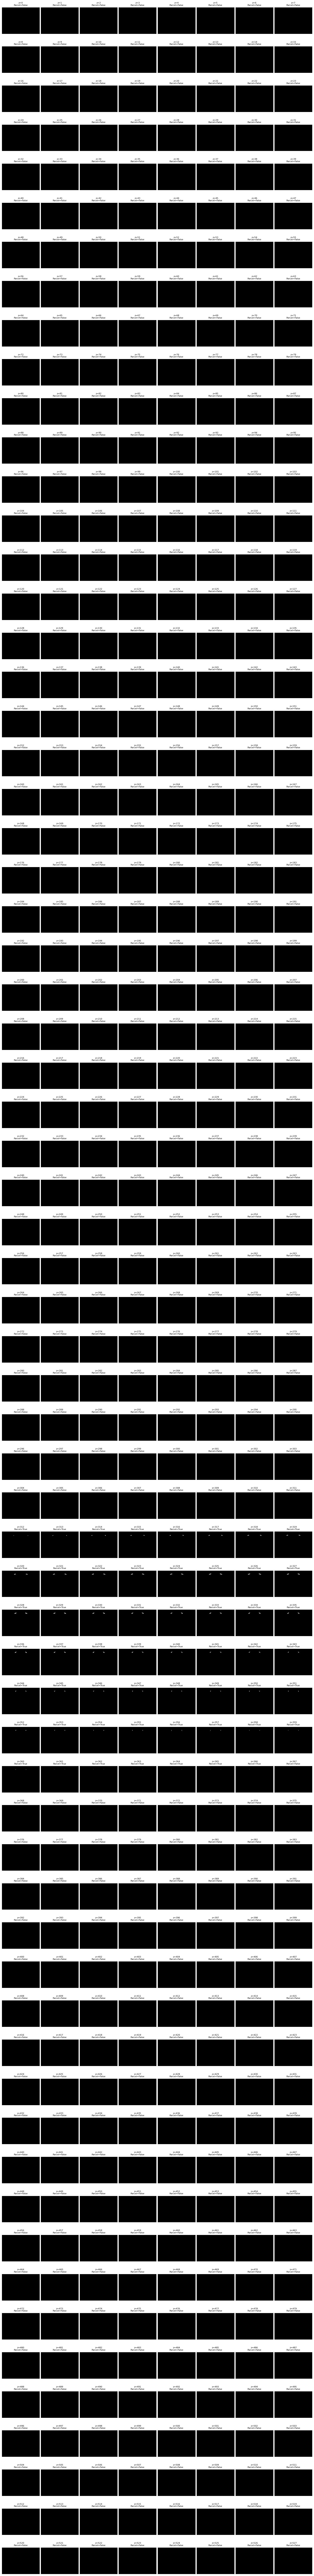

In [10]:
import matplotlib.pyplot as plt
import numpy as np

desired_index = 250
num_slices = annotation_array.shape[2]

cols = 8
rows = int(np.ceil(num_slices / cols))

fig, axes = plt.subplots(rows, cols, figsize=(2 * cols, 2 * rows))
axes = axes.flatten()

for i in range(num_slices):
    ax = axes[i]
    zslice = annotation_array[:, :, i].T
    highlighted_slice = np.where(zslice == desired_index, zslice, 0)
    # Check if parcel is present
    parcel_present = np.any(zslice == desired_index)
    ax.imshow(highlighted_slice, cmap='nipy_spectral', interpolation='none')
    ax.set_title(f'z={i}\nParcel={parcel_present}', fontsize=8)
    ax.axis('off')

for j in range(num_slices, len(axes)):
    axes[j].axis('off')

# fig.suptitle(f'Parcel Index {desired_index}', fontsize=12, y=0.98)
plt.tight_layout(pad=0.5)
plt.show()

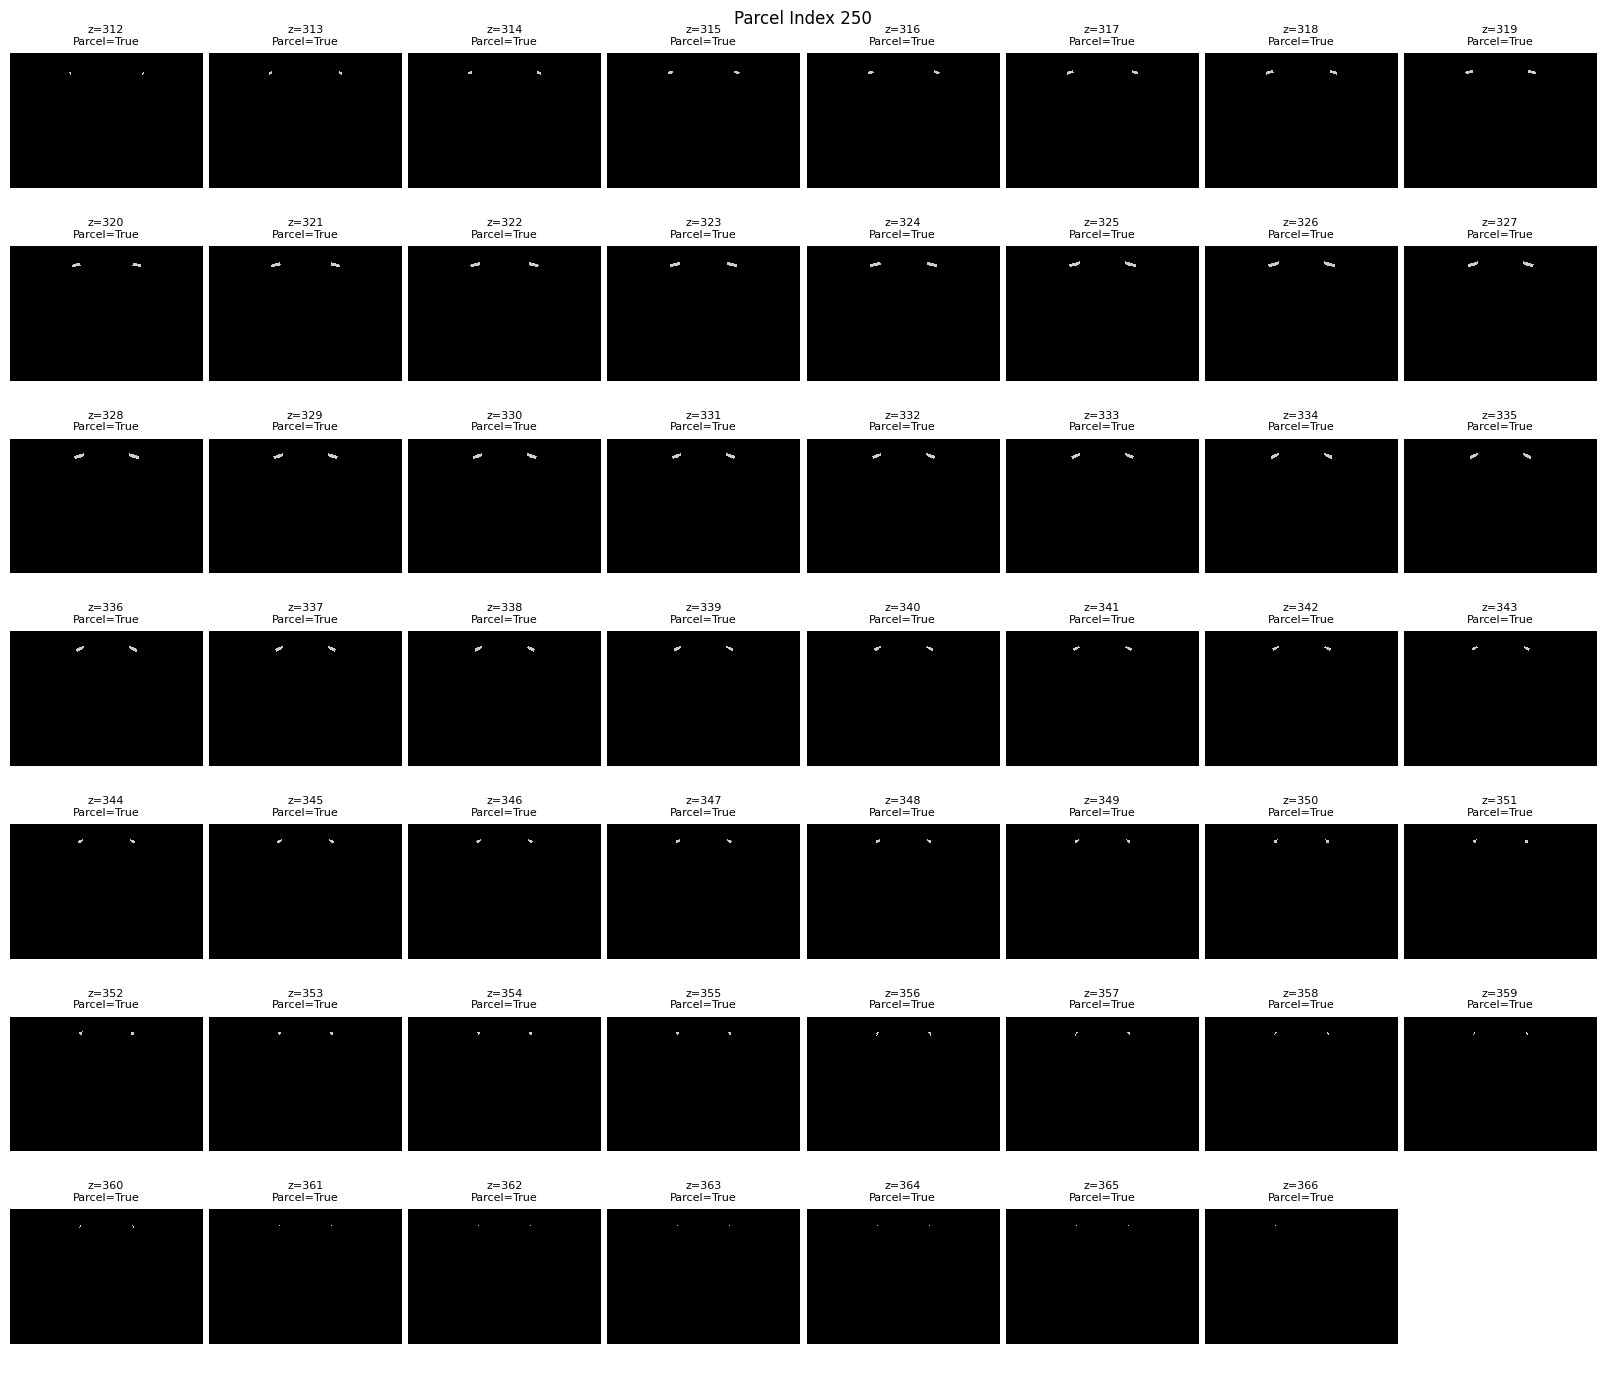

In [11]:
import matplotlib.pyplot as plt
import numpy as np

desired_index = 250
num_slices = annotation_array.shape[2]

# Find slices where parcel is present
valid_slices = [i for i in range(num_slices) if np.any(annotation_array[:, :, i].T == desired_index)]
num_valid_slices = len(valid_slices)

if num_valid_slices == 0:
    print(f"No slices contain Parcel Index {desired_index}")
    plt.close()
else:
    # Set up dynamic grid
    cols = min(8, num_valid_slices)  # Max 8 columns, or fewer if less slices
    rows = int(np.ceil(num_valid_slices / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(2 * cols, 2 * rows))
    if num_valid_slices == 1:
        axes = [axes]  # Handle single subplot case
    else:
        axes = axes.flatten()

    # Plot only valid slices
    for idx, i in enumerate(valid_slices):
        ax = axes[idx]
        zslice = annotation_array[:, :, i].T
        highlighted_slice = np.where(zslice == desired_index, zslice, 0)
        ax.imshow(highlighted_slice, cmap='nipy_spectral', interpolation='none')
        ax.set_title(f'z={i}\nParcel=True', fontsize=8)
        ax.axis('off')

    # Turn off unused axes
    for j in range(num_valid_slices, len(axes)):
        axes[j].axis('off')

    fig.suptitle(f'Parcel Index {desired_index}', fontsize=12, y=0.98)
    plt.tight_layout(pad=0.5)
    plt.show()

In [12]:
df = pd.read_csv("reference/parcellation_to_parcellation_term_membership_acronym.csv")

In [13]:
df

,parcellation_index,organ,category,division,structure,substructure
0,0,unassigned,unassigned,unassigned,unassigned,unassigned
1,1,brain,grey,HY,TMv,TMv
2,2,brain,grey,Isocortex,SSp-m,SSp-m6b
3,5,brain,fiber tracts,lfbs,cst,int
4,6,brain,grey,P,PSV,PSV
...,...,...,...,...,...,...
683,1323,brain,grey,MB,IPN,IPI
684,1324,brain,grey,MB,IPN,IPDM
685,1325,brain,grey,MB,IPN,IPDL
686,1326,brain,grey,MB,IPN,IPRL


In [14]:
print("division: ", sorted(set(df['division'].tolist())))
print("structure: ", sorted(set(df['structure'].tolist())))
print("substructure: ", sorted(set(df['substructure'].tolist())))

division:  ['AQ', 'CB', 'CTXsp', 'HPF', 'HY', 'Isocortex', 'MB', 'MY', 'OLF', 'P', 'PAL', 'STR', 'TH', 'V3', 'V4', 'VL', 'brain-unassigned', 'c', 'cbf', 'cm', 'eps', 'fiber tracts-unassigned', 'lfbs', 'mfbs', 'scwm', 'unassigned']
structure:  ['AAA', 'ACAd', 'ACAv', 'ACB', 'ACVII', 'AD', 'ADP', 'AHN', 'AId', 'AIp', 'AIv', 'AM', 'AMB', 'AN', 'AOB', 'AON', 'AP', 'APN', 'APr', 'AQ', 'ARH', 'ASO', 'AT', 'AUDd', 'AUDp', 'AUDpo', 'AUDv', 'AV', 'AVP', 'AVPV', 'Acs5', 'B', 'BA', 'BAC', 'BLA', 'BMA', 'BST', 'CA1', 'CA2', 'CA3', 'CB-unassigned', 'CEA', 'CENT', 'CL', 'CLA', 'CLI', 'CM', 'COAa', 'COAp', 'COPY', 'CP', 'CS', 'CTXsp-unassigned', 'CU', 'CUL', 'CUN', 'DCO', 'DEC', 'DG', 'DMH', 'DMX', 'DN', 'DP', 'DR', 'DT', 'DTN', 'ECT', 'ECU', 'ENTl', 'ENTm', 'EPd', 'EPv', 'EW', 'Eth', 'FC', 'FL', 'FN', 'FOTU', 'FRP', 'FS', 'GPe', 'GPi', 'GR', 'GRN', 'GU', 'HATA', 'HPF-unassigned', 'HY-unassigned', 'I5', 'IA', 'IAD', 'IAM', 'IC', 'ICB', 'IF', 'IG', 'IGL', 'III', 'IIIn', 'IIn', 'ILA', 'IMD', 'IO', 'IP'

In [15]:
# Assuming your DataFrame is named 'df' and has a 'substructure' column
visp_rows = df[df['substructure'].str.contains('visp', case=False, na=False)]
visp_rows

,parcellation_index,organ,category,division,structure,substructure
17,29,brain,grey,Isocortex,VISp,VISp6a
21,36,brain,grey,Isocortex,VISpm,VISpm2/3
138,250,brain,grey,Isocortex,VISpm,VISpm6a
145,261,brain,grey,Isocortex,VISpl,VISpl2/3
162,295,brain,grey,Isocortex,VISp,VISp6b
199,367,brain,grey,Isocortex,VISpl,VISpl6a
205,383,brain,grey,Isocortex,VISpl,VISpl6b
243,459,brain,grey,Isocortex,VISpm,VISpm6b
255,491,brain,grey,Isocortex,VISpm,VISpm4
284,555,brain,grey,Isocortex,VISpm,VISpm5


In [16]:
import pandas as pd

# Assuming your DataFrame is named 'df' and has a 'substructure' column
visp_rows = df[
    (df['substructure'].str.contains('visp', case=False, na=False)) &  # Contains "visp"
    (~df['substructure'].str.contains('m', case=False, na=False)) &    # Does not contain "m"
    (~df['substructure'].str.contains('l', case=False, na=False)) &    # Does not contain "l"
    (~df['substructure'].str.contains('or', case=False, na=False)) &    # Does not contain "or"
    (df['substructure'].notna()) & (df['substructure'] != '')          # Not NaN or empty
]

In [17]:
visp_rows

,parcellation_index,organ,category,division,structure,substructure
17,29,brain,grey,Isocortex,VISp,VISp6a
162,295,brain,grey,Isocortex,VISp,VISp6b
300,583,brain,grey,Isocortex,VISp,VISp1
375,711,brain,grey,Isocortex,VISp,VISp4
400,768,brain,grey,Isocortex,VISp,VISp5
425,811,brain,grey,Isocortex,VISp,VISp2/3


In [18]:
visp_rows["parcellation_index"].tolist()

[29, 295, 583, 711, 768, 811]